<h1><center> TP1 : Basic functions for Supervised Machine Learning. </center></h1>

The deadline for report submission is Tuesday, November 10th 2020.

Note: the goal of this first TP is to become familiar with 'sklearn' class in Python. In particular, we introduce most popular supervised learning algorithms. 

PART 1 is a list of commands that should be followed step by step. PART 2 is an open problem for which we are waiting for your creativity!

## Imported packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.metrics import balanced_accuracy_score, make_scorer, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd


%matplotlib inline

#  PART 1 -- MNIST


In the first part of TP1 we pursue the following goals:
1. Apply standard ML algorithms on a standard benchmark data
2. Learn basic means of data visualizations
3. Get familiar with sklearn's GridSearchCV and Pipeline

## Loading the data

MNIST dataset consists of black and white images of hand-written digits from $0$ to $9$ of size $28 \times 28$.
In this exercise we will work with a small from the original MNIST dataset. 

If you are interested in the whole dataset, execute the following commands
```python
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=custom_data_home)
```

Hence, the observations $(X_1, Y_1), \ldots, (X_n, Y_n)$ are such that $X_i \in \mathbb{R}^{784}$ and $Y_i \in \{0, \ldots, 9\}$. To be more precise, each component of vector $X_i$ is a number between $0$ and $255$, which signifies the intensity of black color.

The initial goal is to build a classifier $\hat g$, which receives a new image $X$ and outputs the number that is present on the image.

In [2]:
X_train = np.load('data/mnist1_features_train.npy', allow_pickle=True)
y_train = np.load('data/mnist1_labels_train.npy', allow_pickle=True)
X_test = np.load('data/mnist1_features_test.npy', allow_pickle=True)
y_test = np.load('data/mnist1_labels_test.npy', allow_pickle=True)

n_samples, n_features = X_train.shape # extract dimensions of the design matrix
print('Train data contains: {} samples of dimension {}'.format(n_samples, n_features))
print('Test data contains: {} samples'.format(X_test.shape[0]))

Train data contains: 2000 samples of dimension 784
Test data contains: 200 samples


## Looking at the data

Since each observation is actually an image, we can visualize it.

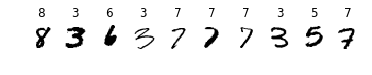

In [3]:
axes = plt.subplots(1, 10)[1]  # creates a grid of 10 plots

# More details about zip() function here https://docs.python.org/3.3/library/functions.html#zip
images_and_labels = list(zip(X_train, y_train)) 
for ax, (image, label) in zip(axes, images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('{}'.format(label))

In [4]:
for i in range(10):
    print('Number of {}s in the train dataset is {}'.format(i, np.sum([y_train == str(i)])))

Number of 0s in the train dataset is 196
Number of 1s in the train dataset is 226
Number of 2s in the train dataset is 214
Number of 3s in the train dataset is 211
Number of 4s in the train dataset is 187
Number of 5s in the train dataset is 179
Number of 6s in the train dataset is 175
Number of 7s in the train dataset is 225
Number of 8s in the train dataset is 186
Number of 9s in the train dataset is 201


<BarContainer object of 10 artists>

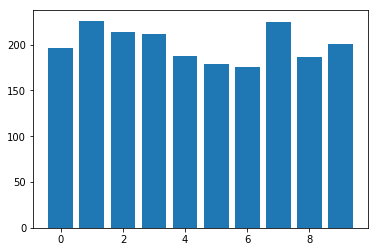

In [5]:
num_labels={ }
for i in range(10):
    num_labels[i] = np.sum(y_train==str(i))
x,y  = zip(*num_labels.items())    

plt.bar(x, y)

From the above we conclude that the dataset is rather balanced, that is, each class contains similar amount of observations. The rarest class is $y = 6$ with $175$ examples and the most common class is $y = 2$ with $226$ examples

## Cross-validation with GridSearchCV


**Question:** Explain in your report what happens when we run 
```python
clf.fit(X_train, y_train)
```


What is the complexity for each of the three following cases? 



- <i>We fit using a GridSearchCv KNeighborsClassifier. clf is the name of the object wich allows to do cross validation based on our knn classifier. We run a cross validatoin with cv=3; we divide (Xtrain, Ytrain) into 3 parts. Then we applied knn algorithm on train of the first part (with k from 1 to 5), and we estimate the error. We repeat it on the second and third parts. The fit method fits the training dataset as features X and labels Y into a model.<br>
- <i>The cost of an algorithm depends on the number of elementary operations (arithmetic or logical) as well as on the number of assignments necessary for its execution. With the notations n= number of training examples, d=number of dimensions of the data, k=number of neighbors : Knn’s complexity is o(knd), SVC’s complexity is o(n2) and Logistic regression’s complexity is o(nd).

***

In [7]:
# GridSearchCV with kNN : a simple baseline
knn = KNeighborsClassifier() # defining classifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5]} # defining parameter space
clf = GridSearchCV(knn, parameters, cv=3)
clf.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf.best_params_))
print('Best classification accuracy in train is: {}'.format(clf.best_score_))
print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))

Returned hyperparameter: {'n_neighbors': 1}
Best classification accuracy in train is: 0.891497944721333
Classification accuracy on test is: 0.875


***

**Question:** What is the test accuracy? What would be the accuracy of random guess?



- <i>The test accuracy is given by running this command : clf.score(Xtest,ytest)). It’s equal to 0.875. The accuracy of random guess is 1/10, it follows an uniform distribution over 10 classes.


In [8]:
predicted_labels= clf.predict(X_test)
cm = confusion_matrix(y_test, predicted_labels,labels=clf.classes_)

print(classification_report(y_test, predicted_labels, labels=clf.classes_))

print("Confusion matrix")
print("By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .")
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.90      1.00      0.95        26
           2       1.00      0.88      0.93        16
           3       0.95      0.83      0.88        23
           4       0.81      0.85      0.83        20
           5       0.58      0.70      0.64        10
           6       0.92      0.96      0.94        24
           7       0.83      0.94      0.88        16
           8       0.88      0.82      0.85        17
           9       0.83      0.73      0.78        26

    accuracy                           0.88       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.88      0.88      0.88       200

Confusion matrix
By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .
[[21  0  0  0  0  0  1  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  

***

**Question:** What is ``` LinearSVC()``` classifier? Which kernel are we using? What is ```C```? (this is a tricky question, try to find the answer online)



- <i>Linear Support Vector Classification is similar to Support Vector Classification with parameter ker- nel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.<br>
- <i>This class supports both dense and sparse input and the multiclass support is handled according to a one- vs-the-rest scheme.<br>
- <i>C is the Regularization parameter. C is like a Lasso penalization, in that it adds biais and it removes variance in order to generalize the model. The margins telles us the tolerance of how many points will be within the margin. If C increases, the margins decreases and then we have overtfitting’s risk. In addition, we must normalize our data before the regularization so that we can calculate comparable distances. The strength of the regularization is inversely proportional to C. It must be strictly positive. We represented the relation between C and the margins in figure 1.

***

**Question:** What is the outcome of ```np.logspace(-8, 8, 17, base=2)```? More generally, what is the ourcome of ```np.logspace(-a, b, k, base=m)```?






-  ```python
  array([3.90625e-03, 7.81250e-03, 1.56250e-02, 3.12500e-02, 6.25000e-02,
       1.25000e-01, 2.50000e-01, 5.00000e-01, 1.00000e+00, 2.00000e+00,
       4.00000e+00, 8.00000e+00, 1.60000e+01, 3.20000e+01, 6.40000e+01,
       1.28000e+02, 2.56000e+02])
     ```
    
- np.logspace(−a, b, k, base = m) Return numbers spaced evenly on a log scale. -a = base, start is the starting value of the sequence. b = base, stop is the final value of the sequence, unless endpoint is False. In that case, num + 1 values are spaced over the interval in log-space, of which all but the last (a sequence of length num) are returned.
    - **k = Number of samples to generate.** Default is 50.
    - **base = m** : The base of the log space. 
    - The step size between the elements in **$ln(samples) / ln(base) ($or $log_b(samples))$** is uniform. Default is 10.0.

In [9]:
# SVM Classifier
svc = LinearSVC(max_iter=5000)
parameters2 = {'C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf2 = GridSearchCV(svc, parameters2, cv=3)
clf2.fit(X_train, y_train)


print('Returned hyperparameter: {}'.format(clf2.best_params_))
print('Best classification accuracy in train is: {}'.format(clf2.best_score_))
print('Classification accuracy on test is: {}'.format(clf2.score(X_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Returned hyperparameter: {'C': 0.00390625}
Best classification accuracy in train is: 0.8095074084579332
Classification accuracy on test is: 0.795


/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


***

**Question** What is the meaning of the warnings? What is the parameter responsible for its appearence?


- <i>It means that the algorithm does not converge using each of the 17 regularization parameters C, because the number of iterations is too low, we could not resolve a convex optimization problem.<br>
- <i>The parameter responsible is maxiter (number of iterations to reach our extremum) in the funtion SVC.

In [10]:
# SVM Classifier + Pipeline
pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters3 = {'svc__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf3 = GridSearchCV(pipe, parameters3, cv=3)
clf3.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf3.best_params_))
print('Best classification accuracy in train is: {}'.format(clf3.best_score_))
print('Classification accuracy on test is: {}'.format(clf3.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best classification accuracy in train is: 0.863002432717575
Classification accuracy on test is: 0.84


***

**Question:** What did we change with respect to the previous run of ```LinearSVC()```?



- <i>We used the pipeline (scaler MaxAbsScaler) to transform the dataset, before using the svm model. The transformation scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0.

---

**Question:** Explain what happens if we execute
```python
    pipe.fit(X_train, y_train)
    pipe.predict(X_test, y_test)
```

- <i>The fit function is executed with default params. The features are first transformed using the pipeline MaxAbsScaler(), and after we considered the Linearsvc model.<br>
- <i>The predict part  won't work because it only takes one parameter
    ``` python
    pipe.fit(X_train,y_train)
    pipe.predict(X_test)
    ```

In [13]:
pipe.fit(X_train,y_train)
pipe.predict(X_test)

array(['4', '1', '6', '5', '3', '4', '1', '3', '3', '1', '0', '6', '3',
       '4', '9', '7', '6', '4', '1', '6', '1', '4', '3', '8', '9', '4',
       '7', '8', '1', '1', '5', '6', '1', '4', '0', '2', '0', '9', '9',
       '6', '2', '4', '6', '4', '9', '8', '7', '7', '0', '9', '4', '6',
       '9', '7', '5', '2', '2', '7', '1', '6', '5', '4', '2', '8', '9',
       '6', '3', '2', '8', '1', '7', '0', '1', '3', '2', '0', '9', '0',
       '0', '0', '1', '0', '8', '7', '9', '9', '2', '1', '8', '9', '3',
       '1', '5', '1', '3', '1', '3', '0', '8', '7', '0', '6', '5', '9',
       '4', '0', '2', '5', '6', '9', '7', '5', '6', '3', '9', '7', '9',
       '0', '9', '3', '9', '1', '3', '1', '3', '6', '1', '3', '8', '8',
       '2', '9', '9', '6', '2', '7', '4', '3', '9', '2', '7', '0', '8',
       '1', '2', '3', '6', '0', '8', '1', '5', '0', '0', '3', '0', '4',
       '3', '1', '3', '9', '0', '4', '3', '9', '4', '8', '4', '7', '3',
       '0', '9', '5', '8', '4', '6', '6', '3', '0', '4', '7', '0

In [ ]:
##  Filtering future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
# Logistic regression
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(solver='lbfgs',max_iter=5000))])
parameters4 = {'logreg__C': np.logspace(-8, 8, 17, base=2)} # defining parameter space
clf4 = GridSearchCV(pipe, parameters4, cv=3)
clf4.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf4.best_params_))
print('Best classification accuracy in train is: {}'.format(clf4.best_score_))
print('Classification accuracy on test is: {}'.format(clf4.score(X_test, y_test)))

Returned hyperparameter: {'logreg__C': 0.0078125}
Best classification accuracy in train is: 0.8705039372205788
Classification accuracy on test is: 0.84


**Question:** what is the difference between ```StandardScaler()``` and ```MaxAbsMaxAbsScalerler()```? What are other scaling options available in ```sklearn```?


- <i>StandardScaler standardize features by removing the mean and scaling to unit variance while MaxAbsScaler does not shift/center the data, and thus does not destroy any sparsity. The others scaling options are MinMaxScaler, RobustScaler and PowerTransformer.


***

**Question:** using the previous code as an example achieve test accuracy $\geq 0.9$. You can use any method from sklearn package. Give a mathematical description of the selected method. Explain the range of considered hyperparamers.


We used the random forest method. Its consists in created a large number of classification trees. The label of a new individual whose features are X, will be determined by a majority vote.

#### Mathematical description:
For $B$ in n_estimators : 
1. For $b=1$ to $B$:
    1. Draw a bootstrap sample $Z^*$ of size $N$ from X_train
    2. Grow a random forest tress $T_b$ to the bootstrapped data, by recursively repeating the following steps for each terminal node of the tree, until the minimum node size $n_{min}$ is reached
        1. Select $p$ variables randomly from the 784 variables
        2. Pick the best variable/split-point among the $p$/
        3. Split the node into two daughter nodes
2. Output the ensemble trees $\{T_b\}^B_1$       

The prediction is then made using majority vote: 

Let $C_b(x)$ be the class prediction of the bth random-forest tree.

> Then $C_{rf}^B(b)= majority\ vote \{C_b(x)\}^B_1$



We chose a number of trees between 800 and 1300 because the more trees we have, the lesser the variance. We start at 800 trees because 784 features.

In [20]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('scaler', MaxAbsScaler()), ('rf', RandomForestClassifier())])
parameters5 = {'rf__n_estimators': [800,900,1000,1100, 1200, 1300]} # defining parameter space
clf5 = GridSearchCV(pipe, parameters5, cv=3)
clf5.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf5.best_params_))
print('Best classification accuracy in train is: {}'.format(clf5.best_score_))
print('Classification accuracy on test is: {}'.format(clf5.score(X_test, y_test)))

Returned hyperparameter: {'rf__n_estimators': 800}
Best classification accuracy in train is: 0.9155032093562827
Classification accuracy on test is: 0.925


In [21]:
predicted_labels= clf5.predict(X_test)
cm = confusion_matrix(y_test, predicted_labels,labels=clf.classes_)

print(classification_report(y_test, predicted_labels, labels=clf.classes_))

print("Confusion matrix")
print("By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .")
print(cm)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.93      1.00      0.96        26
           2       0.93      0.88      0.90        16
           3       0.95      0.91      0.93        23
           4       0.86      0.95      0.90        20
           5       0.82      0.90      0.86        10
           6       1.00      0.83      0.91        24
           7       0.94      1.00      0.97        16
           8       0.94      0.88      0.91        17
           9       0.92      0.88      0.90        26

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

Confusion matrix
By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 1  0 14  0  1  

*** 

## Visualizing errors

Some ```sklearn``` methods are able to output probabilities ```predict_proba(X_test)```.

**Question** There is a mistake in the following chunk of code. Fix it.

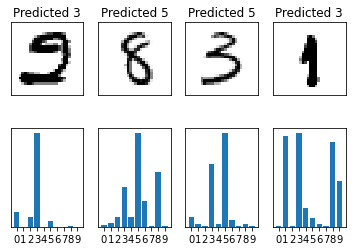

In [23]:
axes = plt.subplots(2, 4)[1]  # creates a grid of 10 plots

# More details about zip() function here https://docs.python.org/3.3/library/functions.html#zip
y_pred = clf4.predict(X_test)
j = 0 # Index which iterates over plots
for true_label, pred_label, image in list(zip(y_test, y_pred, X_test)):
    if j == 4: # We only want to look at 4 first mistakes
        break
    if true_label != pred_label:
        # Plotting predicted probabilities
        axes[1, j].bar(np.arange(10), clf4.predict_proba(image.reshape(1, -1))[0]) 
        axes[1, j].set_xticks(np.arange(10))
        axes[1, j].set_yticks([])
        
        # Plotting the image
        axes[0, j].imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
        axes[0, j].set_xticks([])
        axes[0, j].set_yticks([])
        axes[0, j].set_title('Predicted {}'.format(pred_label))
        j += 1
        
#         plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
#         axex[1, j].plot()

## Changing the Loss function

It often happens that the accuracy is not the right way to evaluate the performance. ```sklearn``` has a large variety of other metrics both in classification and regression. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Here we want to understand how to change the cross-validation metric with minimal effort.

In [24]:
# SVM Classifier + Pipeline + New score function

pipe = Pipeline([('scaler', MaxAbsScaler()), ('svc', svc)])
parameters4 = {'svc__C': np.logspace(-8, 8, 5, base=2)} # defining parameter space
balanced_scorer = make_scorer(balanced_accuracy_score)

clf4 = GridSearchCV(pipe, parameters3, cv=3, scoring=balanced_scorer)
clf4.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf4.best_params_))
print('Best Balanced accuracy in train is: {}'.format(clf4.best_score_))
print('Balanced accuracy on test is: {}'.format(clf4.score(X_test, y_test)))

Returned hyperparameter: {'svc__C': 0.015625}
Best Balanced accuracy in train is: 0.8612334093654231
Balanced accuracy on test is: 0.825627008328415


**Question:** What is ```balanced_accuracy_score```? Write its mathematical mathematical description.

* The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
* 
Σ True positive
/
Σ Condition positive ( true positive + false negative)

* The best value is 1 and the worst value is 0 when adjusted=False.

<i>The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.<br><br>

<i>Σ True positive/ Σ Condition positive ( true positive + false negative)<br><br>

<i>The best value is 1 and the worst value is 0 when adjusted=False.

Sometimes it is important to look at the confusion matrix of the prediction.

**Question:** What is the confusion matrix? What are the conclusions that we can draw from the ```confusion_matrix(y_test, clf4.predict(X_test))```



In [25]:
print(confusion_matrix(y_test, clf4.predict(X_test)))

[[22  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  2  0]
 [ 0  0 14  1  1  0  0  0  0  0]
 [ 0  0  0 18  0  3  0  0  1  1]
 [ 0  1  0  0 17  0  0  0  0  2]
 [ 1  0  0  1  0  6  0  1  0  1]
 [ 1  2  1  0  0  0 20  0  0  0]
 [ 0  0  0  0  1  0  0 15  0  0]
 [ 0  2  0  1  0  3  0  0 11  0]
 [ 0  0  0  0  2  0  0  2  1 21]]


# PART 2 -- Problem

The data that we have contains images with $10$ classes. Normally, accuracy is a reasonable choice of the loss function to be optimized, but in this problem we *really* do not like when digits from $\{5, 6, 7, 8, 9\}$ are predicted to be from $\{0, 1, 2, 3, 4\}$.

**Question:** Propose a loss function that would address our needs. Explain your choice.


**Question:** Following above examples, make an ML pipeline that uses *your* loss function and finds appropriate classifiers.

When writing your report on this part, include:
   1. description of your loss function
   2. description of the pipeline
   3. description of the algorithms that you used 

##  Our solution

In order to test our custom loss function, we decided to use the whole mnist dataset

First, we import the full mnist dataset from the csv file

### Importing the data

In [54]:
df = pd.read_csv("mnist.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, col_1 to y
dtypes: int64(785)
memory usage: 419.2 MB


In [50]:
X= df.iloc[:,:-1].to_numpy()
Y= df.iloc[:,-1].to_numpy()

We split the training set and test set with a test size of **20%**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print('Train data contains: {} samples of dimension {}'.format(X_train.shape[0], X_train.shape[1]))
print('Test data contains: {} samples'.format(X_test.shape[0]))

Train data contains: 56000 samples of dimension 784
Test data contains: 14000 samples


### Custom Loss function

We chose to create our custom loss function.

We made it very simple. We created a function that takes in two parameters: **TrueLabel and Predictedlabel**  :

> For any number between {5-9} predicted with a label in {0-4} : adds 10 points to the loss score, Any other error adds 1.

This penalization insures that the parameters of the model are chosen accordingly. 


The dataset provided in the assignment was not big enough to see the impact of this change. So we downloaded the full mnist dataset, and it worked !

In [69]:
def custom_loss_func(y_true, y_pred):
    """ The custom loss funciton penalizing 10x if the predicted label is in {0-4} 
    and the true label is in {5-9}

    Parameters
    ----------
    y_true : numpy array
        The true labels
    y_pred : numpy array
        predicted labels
    
    Returns
    -------
        float 
            total Score float
    """
    score=np.zeros(len(y_true))
    for i in range(len(y_true)):
        x,y = y_true[i],y_pred[i]
        if x >=5 and y<=4:
            score[i]=10
        elif x-y != 0 :
            score[i]=1
    return np.sum(score)



def count_loss(y_true, y_pred):
    """ Counts the number of 'big' errors ie : labels predicted in {0-4} 
     where true label is in {5-9}
    
    Parameters
    ----------
    y_true : numpy array
        The true labels
    y_pred : numpy array
        predicted labels
    
    Returns
    -------
        int 
            total number of 'big' errors
    """
        
    y_true= np.asarray([int(i) for i in y_true])
    y_pred= np.asarray([int(i) for i in y_pred])
    count=0
    for i in range(len(y_true)):
        x,y = y_true[i],y_pred[i]
        if x in list(range(5,10)) and y in list(range(0,5)):
            count +=1
    return count

In [ ]:
pipe = Pipeline([('scaler', MaxAbsScaler()), ('rf', RandomForestClassifier())])
parameters5 = {'rf__n_estimators': [1200]} # defining parameter space

custom_scorer = make_scorer(custom_loss_func,greater_is_better=False)

clf5 = GridSearchCV(pipe, parameters5, cv=3, scoring=custom_scorer)
clf5.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf5.best_params_))
print('Best accuracy in train is: {}'.format(clf5.best_score_))
print('Accuracy in test is: {}'.format(clf5.score(X_test, y_test)))

In [ ]:
plot_confusion_matrix(clf5, X_test, y_test)  
plt.figure(figsize=(10,10))
plt.show()

### Comparing to the 'normal' loss function

In [ ]:
pipe = Pipeline([('scaler', MaxAbsScaler()), ('rf', RandomForestClassifier())])
parameters55 = {'rf__n_estimators': [1200]} # defining parameter space


clf55 = GridSearchCV(pipe, parameters5, cv=3)
clf55.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf55.best_params_))
print('Best accuracy in train is: {}'.format(clf55.best_score_))
print('Accuracy in test is: {}'.format(clf55.score(X_test, y_test)))


In [ ]:
plot_confusion_matrix(clf55, X_test, y_test)  
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
count_loss(y_test,clf55.predict(X_test))